# MLS Case Study: Amazon Fine Food Reviews


## **Context:**

- This dataset consists of reviews of fine foods from amazon.
- The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include a plain text review.
- It also includes reviews from all other Amazon categories.

#### The purpose of this analysis is to make up a prediction model where we will be able to predict whether a recommendation is positive or negative. In this analysis, we will focus the positive/negative sentiment of the recommendation.



In [1]:
# install and import necessary libraries.

#!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
#import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\selvam.periyasamy\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\selvam.periyasamy\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\selvam.periyasamy\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Loading data into pandas dataframe
data = pd.read_csv("Reviews.csv")

In [3]:
data.shape                                               # print shape of data.

(568454, 10)

In [4]:
data.head()                                              # Print first 5 rows of data.

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
# Taking only 50000 entries for demonstration purpose. As full data will take more time to process.
# Only keeping score and Text columns from the data, as these are useful for our analysis.

data = data.loc[:49999, ['Score', 'Text']]

In [6]:
data.isnull().sum(axis=0)                                # Check for NULL values.

Score    0
Text     0
dtype: int64

In [8]:
pd.set_option('display.max_colwidth', -1) # Display full dataframe information (Non-turncated Text column.)

data.head()                                 # Check first 5 rows of data

,Score,Text
0,5,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.
1,1,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
2,4,"This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch."
3,2,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.
4,5,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal."


In [10]:
data.shape                                # Shape of data

(50000, 2)

### Data Pre-processing:

- Remove html tags.
- Replace contractions in string. (e.g. replace I'm --> I am) and so on.\
- Remove numbers.
- Tokenization
- To remove Stopwords.
- Lemmatized data

We have used NLTK library to tokenize words , remove stopwords and lemmatize the remaining words.

In [11]:
t = 'https://www.youtube.com/w selvam'
soup = BeautifulSoup(t,"html.parser")
soup.get_text()

'https://www.youtube.com/w selvam'

In [12]:
def strip_html(text):
    clean_text = re.sub(r"http\S+", "", text)
    return clean_text

data['Text'] = data['Text'].apply(lambda x: strip_html(x))
data.head()

,Score,Text
0,5,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.
1,1,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
2,4,"This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch."
3,2,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.
4,5,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal."


In [11]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

data['Text'] = data['Text'].apply(lambda x: replace_contractions(x))
data.head()

,Score,Text
0,5,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.
1,1,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
2,4,"This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch."
3,2,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.
4,5,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal."


In [13]:
def remove_numbers(text):
    text = re.sub(r'\d+', '', text)
    return text

data['Text'] = data['Text'].apply(lambda x: remove_numbers(x))
data.head()

,Score,Text
0,5,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.
1,1,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
2,4,"This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch."
3,2,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.
4,5,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal."


In [14]:
data['Text'] = data.apply(lambda row: nltk.word_tokenize(row['Text']), axis=1) # Tokenization of data

In [15]:
data.head()                                                                    # Look at how tokenized data looks.

,Score,Text
0,5,"[I, have, bought, several, of, the, Vitality, canned, dog, food, products, and, have, found, them, all, to, be, of, good, quality, ., The, product, looks, more, like, a, stew, than, a, processed, meat, and, it, smells, better, ., My, Labrador, is, finicky, and, she, appreciates, this, product, better, than, most, .]"
1,1,"[Product, arrived, labeled, as, Jumbo, Salted, Peanuts, ..., the, peanuts, were, actually, small, sized, unsalted, ., Not, sure, if, this, was, an, error, or, if, the, vendor, intended, to, represent, the, product, as, ``, Jumbo, '', .]"
2,4,"[This, is, a, confection, that, has, been, around, a, few, centuries, ., It, is, a, light, ,, pillowy, citrus, gelatin, with, nuts, -, in, this, case, Filberts, ., And, it, is, cut, into, tiny, squares, and, then, liberally, coated, with, powdered, sugar, ., And, it, is, a, tiny, mouthful, of, heaven, ., Not, too, chewy, ,, and, very, flavorful, ., I, highly, recommend, this, yummy, treat, ., If, you, are, familiar, with, the, story, of, C.S, ., Lewis, ', ``, The, Lion, ,, The, Witch, ,, and, The, Wardrobe, '', -, this, is, the, treat, that, seduces, Edmund, into, selling, ...]"
3,2,"[If, you, are, looking, for, the, secret, ingredient, in, Robitussin, I, believe, I, have, found, it, ., I, got, this, in, addition, to, the, Root, Beer, Extract, I, ordered, (, which, was, good, ), and, made, some, cherry, soda, ., The, flavor, is, very, medicinal, .]"
4,5,"[Great, taffy, at, a, great, price, ., There, was, a, wide, assortment, of, yummy, taffy, ., Delivery, was, very, quick, ., If, your, a, taffy, lover, ,, this, is, a, deal, .]"


In [16]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))                              

In [17]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = word.encode("ascii", "ignore").decode()
        new_words.append(new_word)        # Append processed words to new list.
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
        new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['Text'] = data.apply(lambda row: normalize(row['Text']), axis=1)
data.head()

,Score,Text
0,5,buy several vitality can dog food products find good quality product look like stew process meat smell better labrador finicky appreciate product better
1,1,product arrive label jumbo salt peanuts peanuts actually small size unsalted not sure error vendor intend represent product jumbo
2,4,confection around centuries light pillowy citrus gelatin nut case filberts cut tiny square liberally coat powder sugar tiny mouthful heaven not chewy flavorful highly recommend yummy treat familiar story cs lewis lion witch wardrobe treat seduce edmund sell brother sisters witch
3,2,look secret ingredient robitussin believe find get addition root beer extract order good make cherry soda flavor medicinal
4,5,great taffy great price wide assortment yummy taffy delivery quick taffy lover deal


In [28]:
df = pd.DataFrame({'text': ['how are you','who are you']})
df

,text
0,how are you
1,who are you


In [29]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=2)
data_features = vectorizer.fit_transform(df['text'])
data_features.toarray()

array([[1, 1],
       [1, 1]], dtype=int64)

max_featuresint, default=None
If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.

In [30]:
print(vectorizer.get_feature_names())

['are', 'you']


In [31]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1000)                # Keep only 1000 features as number of features will increase the processing time.
data_features = vectorizer.fit_transform(data['Text'])

data_features = data_features.toarray()                        # Convert the data features to array.

In [32]:
data_features.shape

(50000, 1000)

In [33]:
labels = data['Score']
labels = labels.astype('int')

In [34]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [35]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=10)

forest = forest.fit(X_train, y_train)

In [36]:
forest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
forest.score(X_test, y_test)

0.6704666666666667

In [39]:
# Predict the result for test data using the model built above.
result = forest.predict(X_test)

[[ 623   53   50   75  615]
 [ 140  109   71   83  467]
 [ 109   40  253  135  702]
 [  97   39   92  492 1490]
 [ 193   46  108  338 8580]]


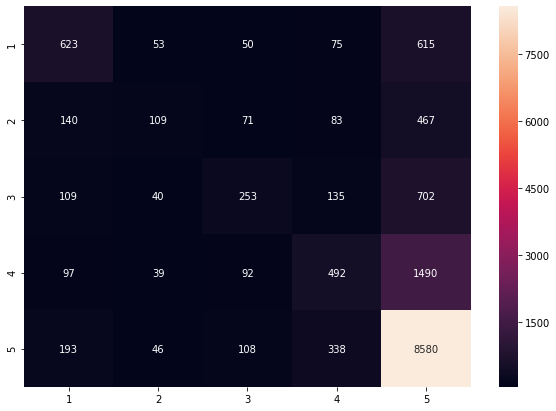

In [41]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "12345"],
                  columns = [i for i in "12345"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

In information retrieval, tf–idf or TFIDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus

document ---> each sentence
corpus......> df

In [48]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
data_features = vectorizer.fit_transform(df['text'])
data_features.toarray()

array([[0.50154891, 0.70490949, 0.        , 0.50154891],
       [0.50154891, 0.        , 0.70490949, 0.50154891]])

In [49]:
vectorizer.get_feature_names()

['are', 'how', 'who', 'you']

In [50]:
# Using TfidfVectorizer to convert text data to numbers.
vectorizer = TfidfVectorizer(max_features=1000)
data_features = vectorizer.fit_transform(data['Text'])

data_features = data_features.toarray()

data_features.shape

(50000, 1000)

In [51]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=10)

forest = forest.fit(X_train, y_train)

In [52]:
forest.score(X_test, y_test)

0.6712666666666667

In [53]:
result = forest.predict(X_test)

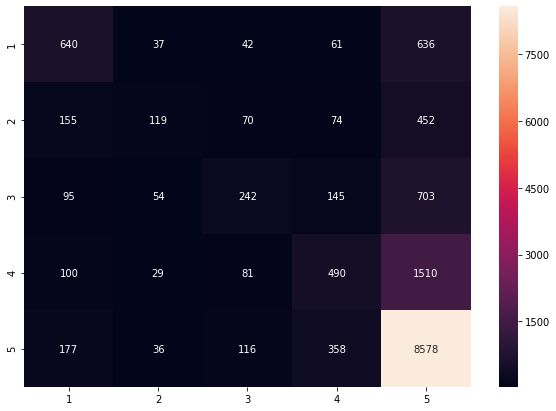

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "12345"],
                  columns = [i for i in "12345"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

Summary:

- We used dataset which has reviews in text format and their sentiment score on the scale of 1 to 5.
- The goal was to build a model for text-classification.
- We Pre-processed the data using variuos techniques and libraries.
- The pre-precessed data is converted to numbers, so that we can feed the data in the model.
- After building the classification model, we predicted the result for the test data.
- After that we saw that using the above techniques, our model performed good in perspective of how the text classification models perform.
- However, we can still increase the accuracy of our model by increasing the dataset we took into account for the model building (As the time was constraint here so we only used 50000 entries out of around 500000 entries, which means we built our model using 10% of dataset.)
- One more way to increase accuracy is to use different variations of Pre-processing techniques.

The sentiment function of textblob returns two properties, polarity, and subjectivity.

Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].

In [68]:
text = 'Great Learning is a great platform to learn data science.'
TextBlob(text).sentiment # 0 is objective 1 is subjective

Sentiment(polarity=0.8, subjectivity=0.75)

We can see that polarity is 0.8, which means that the statement is positive and 0.75 subjectivity refers that mostly it is a public opinion and not a factual information.

In [74]:
text = 'Water freezes at 0 deg.'
TextBlob(text).sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [63]:
from textblob import TextBlob
#Detect Sentiment - English
def detect_sentiment(text):
    senti=TextBlob(text)
    senti = senti.sentiment
    return senti

In [64]:
data['sentiment'] = data['Text'].apply(detect_sentiment)

In [65]:
data.head()

,Score,Text,sentiment
0,5,buy several vitality can dog food products find good quality product look like stew process meat smell better labrador finicky appreciate product better,"(0.425, 0.4)"
1,1,product arrive label jumbo salt peanuts peanuts actually small size unsalted not sure error vendor intend represent product jumbo,"(-0.033333333333333326, 0.762962962962963)"
2,4,confection around centuries light pillowy citrus gelatin nut case filberts cut tiny square liberally coat powder sugar tiny mouthful heaven not chewy flavorful highly recommend yummy treat familiar story cs lewis lion witch wardrobe treat seduce edmund sell brother sisters witch,"(0.187, 0.5479999999999999)"
3,2,look secret ingredient robitussin believe find get addition root beer extract order good make cherry soda flavor medicinal,"(0.14999999999999997, 0.65)"
4,5,great taffy great price wide assortment yummy taffy delivery quick taffy lover deal,"(0.4583333333333333, 0.6)"


In [75]:
from nltk import ngrams

sentence = 'this is a foo bar sentences and i want to ngramize it'

n = 6
sixgrams = ngrams(sentence.split(), n)

for grams in sixgrams:
    print(grams)

('this', 'is', 'a', 'foo', 'bar', 'sentences')
('is', 'a', 'foo', 'bar', 'sentences', 'and')
('a', 'foo', 'bar', 'sentences', 'and', 'i')
('foo', 'bar', 'sentences', 'and', 'i', 'want')
('bar', 'sentences', 'and', 'i', 'want', 'to')
('sentences', 'and', 'i', 'want', 'to', 'ngramize')
('and', 'i', 'want', 'to', 'ngramize', 'it')
